## Experiments of mock server under different loads on the mock server

In [32]:
import pandas as pd
import os
import json
from copy import deepcopy
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [33]:
series = 24
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,1,60,24,testing static trace,1
1,2,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,10,60,24,testing static trace,1
2,3,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,20,60,24,testing static trace,1
3,4,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,40,60,24,testing static trace,1
4,5,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,1,60,24,testing static trace,1
5,6,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,10,60,24,testing static trace,1
6,7,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,20,60,24,testing static trace,1
7,8,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,40,60,24,testing static trace,1
8,9,6-mlserver-mock,mock-one,0.0,4,8Gi,10,1,1,60,24,testing static trace,1
9,10,6-mlserver-mock,mock-one,0.0,4,8Gi,10,1,10,60,24,testing static trace,1


In [34]:
results.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [35]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '10'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '5'],
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 25,
    'series_meta': 'testing static trace',
    'timeout': 60,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 1000]},
    'workload_type': 'static'}


## Model Variant 0
0 means a sleep time of 0 in the serever (mimicing the model)

### Timeout count for Variant 0
The amount of request that were timed out under sleep time of 0

In [36]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load', 'load_duration']
results_columns = ['duration', 'timeout_count']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)

,model_variant,max_batch_size,cpu_request,load,load_duration,duration,timeout_count
0,0.0,1,4,1,60,61,0
1,0.0,1,4,10,60,60,0
2,0.0,1,4,20,60,73,0
3,0.0,1,4,40,60,140,0
4,0.0,5,4,1,60,62,0
5,0.0,5,4,10,60,60,0
6,0.0,5,4,20,60,119,23
7,0.0,5,4,40,60,239,44
8,0.0,10,4,1,60,61,0
9,0.0,10,4,10,60,60,0


### Separated latencies for Variant 0
client to model server
model
model server back to client

,experiment_id,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1,0.0,1,4,1,0.011538,0.144655,0.007719,0.009298
1,2,0.0,1,4,10,0.011299,0.330229,0.008454,0.174586
2,3,0.0,1,4,20,0.012000,7.072800,0.008679,5.315818
3,4,0.0,1,4,40,0.018568,41.486617,0.009020,5.290336
4,5,0.0,5,4,1,0.032618,1.027526,0.010919,0.017495
5,6,0.0,5,4,10,0.026857,0.770311,0.016821,0.317850
6,7,0.0,5,4,20,0.047434,31.165133,0.018601,6.119334
7,8,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612
8,9,0.0,10,4,1,0.012120,1.093901,0.009518,0.016424
9,10,0.0,10,4,10,0.089203,1.338578,0.035118,0.586460


Text(0, 0.5, 'Latency (seconds)')

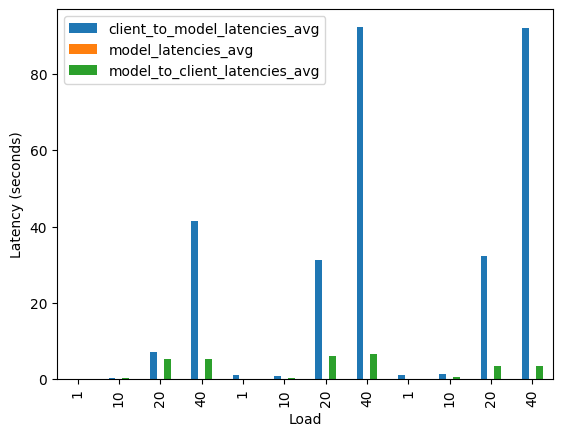

In [37]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['experiment_id', 'model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

## Model Variant 0.5
0.5 means a sleep time of 0.5 in the serever (mimicing the model)

### Timeout count for Variant 0.5
The amount of request that were timed out under sleep time of 0.5

In [38]:
model_variant = 0.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load', 'load_duration']
results_columns = ['duration', 'timeout_count']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)

,model_variant,max_batch_size,cpu_request,load,load_duration,duration,timeout_count
0,0.5,1,4,1,60,61,0
1,0.5,1,4,10,60,100,567
2,0.5,1,4,20,60,185,1170
3,0.5,1,4,40,60,258,2371
4,0.5,5,4,1,60,62,0
5,0.5,5,4,10,60,69,0
6,0.5,5,4,20,60,136,18
7,0.5,5,4,40,60,271,33
8,0.5,10,4,1,60,65,0
9,0.5,10,4,10,60,61,1


### Separated latencies for Variant 0.5
client to model server
model
model server back to client

,experiment_id,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,13,0.5,1,4,1,0.512352,0.210082,0.508969,0.013629
1,14,0.5,1,4,10,0.515319,7.359817,0.509010,0.066546
2,15,0.5,1,4,20,0.511021,7.488019,0.508997,0.157477
3,16,0.5,1,4,40,0.509837,7.603411,0.508640,0.572022
4,17,0.5,5,4,1,0.514106,1.011035,0.510454,0.020535
5,18,0.5,5,4,10,0.523583,4.884360,0.517401,0.373680
6,19,0.5,5,4,20,0.523824,38.923981,0.517443,1.134062
7,20,0.5,5,4,40,0.530527,107.753737,0.517841,0.906017
8,21,0.5,10,4,1,0.512857,1.017344,0.510316,0.019802
9,22,0.5,10,4,10,0.564354,1.377840,0.534387,0.443926


Text(0, 0.5, 'Latency (seconds)')

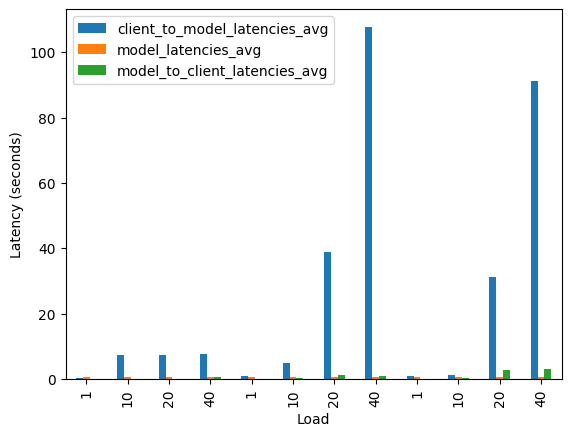

In [39]:
model_variant = 0.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['experiment_id', 'model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

## Model Variant 1.5
0.5 means a sleep time of 1.5 in the serever (mimicing the model)

### Timeout count for Variant 1.5
The amount of request that were timed out under sleep time of 1.5

In [40]:
model_variant = 1.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load', 'load_duration']
results_columns = ['duration', 'timeout_count']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)

,model_variant,max_batch_size,cpu_request,load,load_duration,duration,timeout_count
0,1.5,1,4,1,60,75,38
1,1.5,1,4,10,60,100,590
2,1.5,1,4,20,60,185,1191
3,1.5,1,4,40,60,215,2391
4,1.5,5,4,1,60,65,0
5,1.5,5,4,10,60,100,540
6,1.5,5,4,20,60,185,1151
7,1.5,5,4,40,60,302,2355
8,1.5,10,4,1,60,63,0
9,1.5,10,4,10,60,94,399


,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1.5,1,4,1,1.510249,7.761054,1.509290,0.018381
1,1.5,1,4,10,1.509875,6.946739,1.508987,0.068808
2,1.5,1,4,20,1.515261,6.394397,1.509834,0.206498
3,1.5,1,4,40,1.510005,6.408749,1.508762,0.330017
4,1.5,5,4,1,1.515609,1.252524,1.511309,0.027156
5,1.5,5,4,10,1.538193,6.909880,1.520653,0.213754
6,1.5,5,4,20,1.526544,6.914498,1.519559,0.864818
7,1.5,5,4,40,1.547570,7.097851,1.522760,1.094608
8,1.5,10,4,1,1.519702,1.236252,1.511578,0.024573
9,1.5,10,4,10,1.581063,7.110468,1.537276,0.420761


Text(0, 0.5, 'Latency (seconds)')

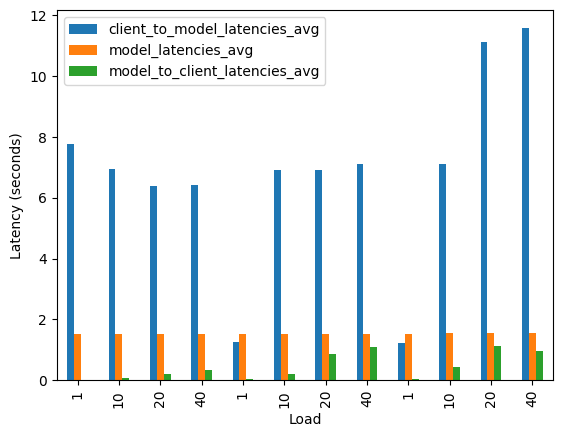

In [41]:
model_variant = 1.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

## Sending times check for a single request

In [42]:
results = loader.read_results()
experiment_id = 8

model_variant = 1
experiment_ids = key_config_df[
    key_config_df['experiment_id'] == experiment_id]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)

latencies, timeout_count = loader.latency_calculator(
    loader.flatten_results(results[str(experiment_id)]['responses']))
print(f'{timeout_count=}')
print(pd.DataFrame(latencies))

,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612


timeout_count=44
      client_to_model_latencies  model_latencies  model_to_client_latencies
0                      4.517413         0.016135                   1.051598
1                      5.198128         0.016308                   2.536516
2                      5.183739         0.016308                   2.531532
3                      0.780901         0.022212                   0.067724
4                      3.068623         0.016296                   1.536479
...                         ...              ...                        ...
2351                 179.218722         0.018703                   0.143705
2352                 177.937227         0.016072                   1.414754
2353                 177.465177         0.016526                   1.878260
2354                 178.743598         0.016621                   0.570757
2355                 177.463582         0.016526                   1.876095

[2356 rows x 3 columns]


In [43]:
responses = loader.flatten_results(results[str(experiment_id)]['responses'])
time.ctime(json.loads(responses[0]['outputs'][0]['data'][0])['time']['arrival_mock_one'])

'Thu Nov  3 17:05:13 2022'

In [44]:
import time
experiment_id = 4
responses = loader.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    sending_time = time.ctime(response['time']['sending_time'])
    model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
    arrival_time = time.ctime(response['time']['arrival_time'])
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")


sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:46 2022, arrival time: Thu Nov  3 16:50:46 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:45 2022, arrival time: Thu Nov  3 16:50:46 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:54 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:53 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:47 2022, arrival time: Thu Nov  3 16:50:53 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:46 2022, arrival time: Thu Nov  3 16:50:48 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:54 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:47 2022, arrival time: Thu Nov  3 16:50:52 2022


,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0.0,1,4,40,0.018568,41.486617,0.009020,5.290336
1,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612
2,0.0,10,4,40,0.050394,92.047814,0.033147,3.370664
3,0.5,1,4,40,0.509837,7.603411,0.508640,0.572022
4,0.5,5,4,40,0.530527,107.753737,0.517841,0.906017
5,0.5,10,4,40,0.560462,91.345679,0.533624,3.105754
6,1.0,1,4,40,1.015556,6.922370,1.009713,0.457565
7,1.0,5,4,40,1.037128,7.885922,1.018855,1.281852
8,1.0,10,4,40,1.059572,97.004105,1.030755,0.603672
9,1.5,1,4,40,1.510005,6.408749,1.508762,0.330017


Text(0, 0.5, 'Latency (seconds)')

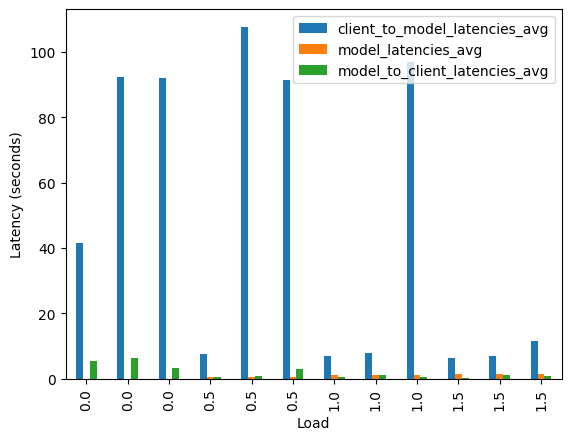

In [49]:
load = 40
experiment_ids = key_config_df[
    key_config_df['load'] == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")